,open,high,low,close,volume,trade_count,vwap,symbol,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total
timestamp,,,,,,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,63.120,64.45,62.820,64.38,14978485,122316,63.871775,KO,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN
2022-07-05 04:00:00+00:00,64.180,64.18,62.415,63.28,15801438,139761,63.223210,KO,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-06 04:00:00+00:00,63.600,64.09,63.190,63.41,13334889,112681,63.496090,KO,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-07 04:00:00+00:00,63.260,63.58,62.700,62.91,14761538,118755,63.055389,KO,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-08 04:00:00+00:00,63.030,63.42,62.880,63.14,11219899,98379,63.136837,KO,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,61.205,61.29,60.390,61.22,12856579,137435,60.961565,KO,61.983154,60.7180,59.452846,0.0,0.0,0.0,0.0,11033.34,11033.34
2023-06-27 04:00:00+00:00,61.220,61.36,60.980,61.09,9072005,102832,61.101531,KO,62.015818,60.7595,59.503182,0.0,0.0,0.0,0.0,11033.34,11033.34
2023-06-28 04:00:00+00:00,60.880,61.04,60.400,60.52,11174101,115899,60.575969,KO,61.972367,60.7965,59.620633,0.0,0.0,0.0,0.0,11033.34,11033.34


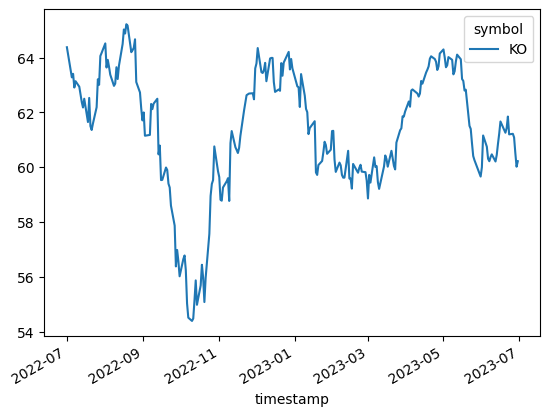

In [11]:
#CONSERVATIVE STOCKS PORTFOLIO:

#Each portfolio contains a starting amount of $100000 dvided equally between all stocks in the portfolio
    #Bollinger Bands being used to make trade decisions
    #There are 9 stocks in this portfolio therefore $11111 in each stock
    #Ideally share amount/trade would being dynamic, continuousily dividing $11111 by the current price to avoid using more funds than are dedicated for that stock. 
    #For the purpose of this exercise we will use $11111 divided by the price on th start date to determine share amount/trade.

import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import hvplot.pandas
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import math
import ta
import os
import requests
import yfinance as yf
import cerebro
import backtrader as bt
from datetime import datetime
from finta import TA
%matplotlib inline

alpaca_api_key = "PKRALAY7BXD8GDXWX8UN"
alpaca_secret_key = "dbJpTfuZKlQQ048BNoOhL4kRZBnl1eFsOYsdMnP6"
alpaca_endpoint = "https://paper-api.alpaca.markets"
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2",
    base_url = alpaca_endpoint)

ticker = ["KO"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim


stock_df = ticker_data.loc[:,["close"]]
stock_df = ticker_data[["close","symbol"]]
stock_df = stock_df.pivot(columns='symbol', values='close')
stock_df.plot()

bb_signal_df  = ticker_data.copy()
bb_signal_df.head()

bbands_df = TA.BBANDS(bb_signal_df)
bbands_df.iloc[17:1762, :]

bb_signal_df = pd.concat([bb_signal_df, bbands_df], axis=1)
bb_signal_df.iloc[17:1762, :]


bb_signal_df["Signal"] = 0.0

for index, row in bb_signal_df.iterrows():
    if row["close"] < row["BB_LOWER"]:
        bb_signal_df.loc[index, "Signal"] = 1.0
    if row["close"] > row["BB_UPPER"]:
        bb_signal_df.loc[index,"Signal"] = -1.0


initial_capital = float(11111)
share_size = 22

bb_signal_df["Position"] = share_size * bb_signal_df["Signal"]
bb_signal_df.tail(2556)

bb_signal_df["Entry/Exit Position"] = bb_signal_df["Position"].diff()
bb_signal_df.tail(2556)

bb_signal_df["Portfolio Holdings"] = bb_signal_df["close"] * bb_signal_df["Position"]
bb_signal_df.tail(2556)

bb_signal_df["Portfolio Cash"] = (
    initial_capital - (bb_signal_df["close"] * bb_signal_df["Entry/Exit Position"]).cumsum()
)
bb_signal_df.tail(2556)

bb_signal_df["Portfolio Total"] = bb_signal_df["Portfolio Cash"] + bb_signal_df["Portfolio Holdings"]
bb_signal_df.tail(2556)

,open,high,low,close,volume,trade_count,vwap,symbol,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total
timestamp,,,,,,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,263.76,268.9500,260.65,268.03,1287858,28529,265.331107,CI,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN
2022-07-05 04:00:00+00:00,264.52,265.2300,256.37,264.84,2321179,41698,262.213460,CI,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-06 04:00:00+00:00,265.04,273.1989,263.41,271.09,3235194,40158,270.061274,CI,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-07 04:00:00+00:00,272.05,277.4500,272.05,275.78,5007548,46077,275.816905,CI,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-08 04:00:00+00:00,275.61,281.4900,274.68,279.19,2312381,36486,278.945880,CI,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,275.41,278.6600,274.01,276.41,1396359,26894,276.670421,CI,284.047597,263.7245,243.401403,0.0,0.0,0.0,0.0,9534.32,9534.32
2023-06-27 04:00:00+00:00,273.22,276.4400,273.13,275.80,1168881,24486,275.506554,CI,284.073051,265.3095,246.545949,0.0,0.0,0.0,0.0,9534.32,9534.32
2023-06-28 04:00:00+00:00,275.68,276.0600,273.09,274.74,803790,18518,274.659166,CI,282.781341,266.9145,251.047659,0.0,0.0,0.0,0.0,9534.32,9534.32


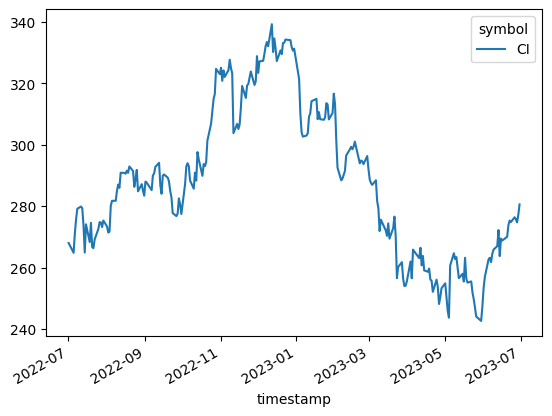

In [18]:
ticker = ["CI"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim


stock_df_1 = ticker_data.loc[:,["close"]]
stock_df_1 = ticker_data[["close","symbol"]]
stock_df_1 = stock_df_1.pivot(columns='symbol', values='close')
stock_df_1.plot()

bb_signal_df_1  = ticker_data.copy()
bb_signal_df_1.head()

bbands_df_1 = TA.BBANDS(bb_signal_df_1)
bbands_df_1.iloc[17:1762, :]

bb_signal_df_1 = pd.concat([bb_signal_df_1, bbands_df_1], axis=1)
bb_signal_df_1.iloc[17:1762, :]


bb_signal_df_1["Signal"] = 0.0

for index, row in bb_signal_df_1.iterrows():
    if row["close"] < row["BB_LOWER"]:
        bb_signal_df_1.loc[index, "Signal"] = 1.0
    if row["close"] > row["BB_UPPER"]:
        bb_signal_df_1.loc[index,"Signal"] = -1.0


initial_capital = float(11111)
share_size = 42

bb_signal_df_1["Position"] = share_size * bb_signal_df_1["Signal"]
bb_signal_df_1.tail(2556)

bb_signal_df_1["Entry/Exit Position"] = bb_signal_df_1["Position"].diff()
bb_signal_df_1.tail(2556)

bb_signal_df_1["Portfolio Holdings"] = bb_signal_df_1["close"] * bb_signal_df_1["Position"]
bb_signal_df_1.tail(2556)

bb_signal_df_1["Portfolio Cash"] = (
    initial_capital - (bb_signal_df_1["close"] * bb_signal_df_1["Entry/Exit Position"]).cumsum()
)
bb_signal_df_1.tail(2556)

bb_signal_df_1["Portfolio Total"] = bb_signal_df_1["Portfolio Cash"] + bb_signal_df_1["Portfolio Holdings"]
bb_signal_df_1.tail(2556)

,open,high,low,close,volume,trade_count,vwap,symbol,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total
timestamp,,,,,,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,144.24,146.2498,143.400,146.11,5892213,69546,145.328766,PG,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN
2022-07-05 04:00:00+00:00,144.58,146.1000,142.545,144.70,5730358,77389,144.215201,PG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-06 04:00:00+00:00,145.51,147.4900,144.970,146.05,5449877,75393,146.235480,PG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-07 04:00:00+00:00,145.29,146.1900,144.600,146.00,6598624,73040,145.597280,PG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-08 04:00:00+00:00,145.99,146.8099,144.575,145.02,4270798,56677,145.426013,PG,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,148.10,148.9700,146.720,148.61,4353077,67788,148.283130,PG,150.812947,146.4645,142.116053,0.0,0.0,0.0,0.0,10575.08,10575.08
2023-06-27 04:00:00+00:00,148.44,150.1700,148.390,150.02,5445676,75491,149.610605,PG,151.289750,146.6955,142.101250,0.0,0.0,0.0,0.0,10575.08,10575.08
2023-06-28 04:00:00+00:00,149.33,150.3000,147.960,149.99,6760782,94284,149.611751,PG,151.541788,147.0360,142.530212,0.0,0.0,0.0,0.0,10575.08,10575.08


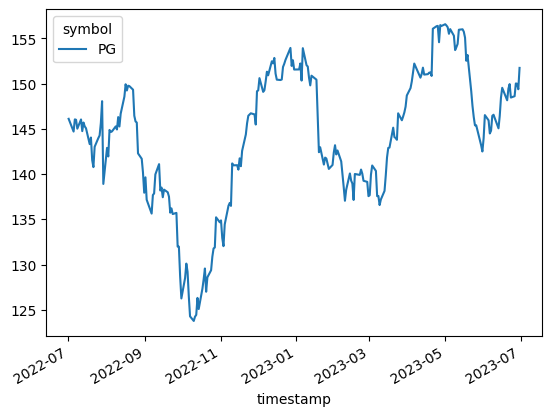

In [20]:

ticker = ["PG"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim


stock_df_2 = ticker_data.loc[:,["close"]]
stock_df_2 = ticker_data[["close","symbol"]]
stock_df_2 = stock_df_2.pivot(columns='symbol', values='close')
stock_df_2.plot()

bb_signal_df_2  = ticker_data.copy()
bb_signal_df_2.head()

bbands_df_2 = TA.BBANDS(bb_signal_df_2)
bbands_df_2.iloc[17:1762, :]

bb_signal_df_2 = pd.concat([bb_signal_df_2, bbands_df_2], axis=1)
bb_signal_df_2.iloc[17:1762, :]


bb_signal_df_2["Signal"] = 0.0

for index, row in bb_signal_df_2.iterrows():
    if row["close"] < row["BB_LOWER"]:
        bb_signal_df_2.loc[index, "Signal"] = 1.0
    if row["close"] > row["BB_UPPER"]:
        bb_signal_df_2.loc[index,"Signal"] = -1.0


initial_capital = float(11111)
share_size = 77

bb_signal_df_2["Position"] = share_size * bb_signal_df_2["Signal"]
bb_signal_df_2.tail(2556)

bb_signal_df_2["Entry/Exit Position"] = bb_signal_df_2["Position"].diff()
bb_signal_df_2.tail(2556)

bb_signal_df_2["Portfolio Holdings"] = bb_signal_df_2["close"] * bb_signal_df_2["Position"]
bb_signal_df_2.tail(2556)

bb_signal_df_2["Portfolio Cash"] = (
    initial_capital - (bb_signal_df_2["close"] * bb_signal_df_2["Entry/Exit Position"]).cumsum()
)
bb_signal_df_2.tail(2556)

bb_signal_df_2["Portfolio Total"] = bb_signal_df_2["Portfolio Cash"] + bb_signal_df_2["Portfolio Holdings"]
bb_signal_df_2.tail(2556)

,open,high,low,close,volume,trade_count,vwap,symbol,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total
timestamp,,,,,,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,512.32,517.53,502.31,517.40,2402069,56915,511.588364,UNH,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN
2022-07-05 04:00:00+00:00,507.64,511.00,492.25,505.24,3010996,79808,500.716579,UNH,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-06 04:00:00+00:00,505.64,517.41,504.30,515.29,2485969,65833,512.798504,UNH,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-07 04:00:00+00:00,515.25,517.30,512.23,514.38,2374932,56416,514.785411,UNH,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-08 04:00:00+00:00,512.31,528.37,511.01,518.63,3072771,64459,521.299615,UNH,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,478.14,481.31,473.00,479.06,2968502,64170,478.684062,UNH,505.999149,482.1475,458.295851,0.0,0.0,0.0,0.0,10679.66,10679.66
2023-06-27 04:00:00+00:00,478.13,483.18,477.77,482.56,3693508,70329,481.194009,UNH,506.049924,482.1995,458.349076,0.0,0.0,0.0,0.0,10679.66,10679.66
2023-06-28 04:00:00+00:00,481.96,482.12,473.98,474.45,3670783,77917,476.435918,UNH,506.013037,481.9295,457.845963,0.0,0.0,0.0,0.0,10679.66,10679.66


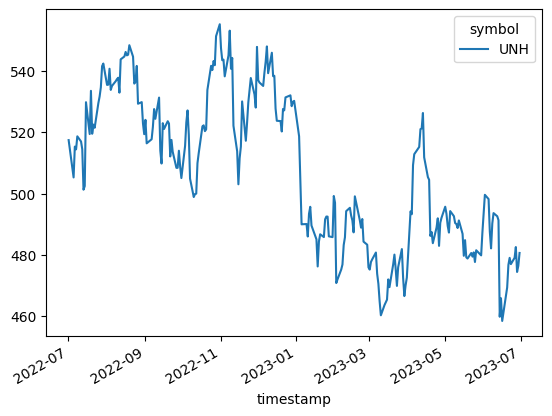

In [22]:
ticker = ["UNH"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim


stock_df_3 = ticker_data.loc[:,["close"]]
stock_df_3 = ticker_data[["close","symbol"]]
stock_df_3 = stock_df_3.pivot(columns='symbol', values='close')
stock_df_3.plot()

bb_signal_df_3  = ticker_data.copy()
bb_signal_df_3.head()

bbands_df_3 = TA.BBANDS(bb_signal_df_3)
bbands_df_3.iloc[17:1762, :]

bb_signal_df_3 = pd.concat([bb_signal_df_3, bbands_df_3], axis=1)
bb_signal_df_3.iloc[17:1762, :]


bb_signal_df_3["Signal"] = 0.0

for index, row in bb_signal_df_3.iterrows():
    if row["close"] < row["BB_LOWER"]:
        bb_signal_df_3.loc[index, "Signal"] = 1.0
    if row["close"] > row["BB_UPPER"]:
        bb_signal_df_3.loc[index,"Signal"] = -1.0


initial_capital = float(11111)
share_size = 21

bb_signal_df_3["Position"] = share_size * bb_signal_df_3["Signal"]
bb_signal_df_3.tail(2556)

bb_signal_df_3["Entry/Exit Position"] = bb_signal_df_3["Position"].diff()
bb_signal_df_3.tail(2556)
bb_signal_df_3["Portfolio Holdings"] = bb_signal_df_3["close"] * bb_signal_df_3["Position"]
bb_signal_df_3.tail(2556)

bb_signal_df_3["Portfolio Cash"] = (
    initial_capital - (bb_signal_df_3["close"] * bb_signal_df_3["Entry/Exit Position"]).cumsum()
)
bb_signal_df_3.tail(2556)

bb_signal_df_3["Portfolio Total"] = bb_signal_df_3["Portfolio Cash"] + bb_signal_df_3["Portfolio Holdings"]
bb_signal_df_3.tail(2556)

,open,high,low,close,volume,trade_count,vwap,symbol,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total
timestamp,,,,,,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,275.73,280.7500,274.55,279.08,2793981,59562,277.909247,HD,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN
2022-07-05 04:00:00+00:00,275.50,283.7300,275.03,283.73,3224176,63731,280.898386,HD,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.0,11111.0
2022-07-06 04:00:00+00:00,284.99,285.9212,280.52,283.58,2184509,53749,283.295981,HD,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.0,11111.0
2022-07-07 04:00:00+00:00,282.84,286.9700,281.45,286.69,3118844,63011,285.096056,HD,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.0,11111.0
2022-07-08 04:00:00+00:00,285.99,287.9900,283.91,286.47,1877585,42095,286.117847,HD,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.0,11111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,302.67,309.2100,301.98,307.89,4441518,80433,306.811796,HD,309.006494,297.8645,286.722506,0.0,0.0,0.0,0.0,12432.6,12432.6
2023-06-27 04:00:00+00:00,308.15,315.4627,307.89,313.74,5342593,103688,313.228891,HD,311.843091,298.9100,285.976909,-1.0,-40.0,-40.0,-12549.6,24982.2,12432.6
2023-06-28 04:00:00+00:00,312.00,312.9363,306.06,306.51,4025929,81914,308.171209,HD,312.592673,299.6155,286.638327,0.0,0.0,40.0,0.0,12721.8,12721.8


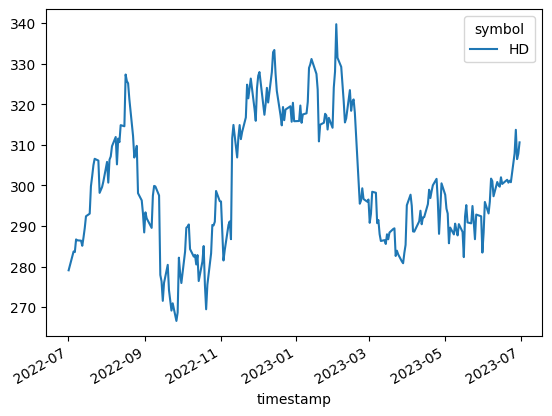

In [24]:
ticker = ["HD"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim


stock_df_4 = ticker_data.loc[:,["close"]]
stock_df_4 = ticker_data[["close","symbol"]]
stock_df_4 = stock_df_4.pivot(columns='symbol', values='close')
stock_df_4.plot()

bb_signal_df_4  = ticker_data.copy()
bb_signal_df_4.head()

bbands_df_4 = TA.BBANDS(bb_signal_df_4)
bbands_df_4.iloc[17:1762, :]

bb_signal_df_4 = pd.concat([bb_signal_df_4, bbands_df_4], axis=1)
bb_signal_df_4.iloc[17:1762, :]


bb_signal_df_4["Signal"] = 0.0

for index, row in bb_signal_df_4.iterrows():
    if row["close"] < row["BB_LOWER"]:
        bb_signal_df_4.loc[index, "Signal"] = 1.0
    if row["close"] > row["BB_UPPER"]:
        bb_signal_df_4.loc[index,"Signal"] = -1.0


initial_capital = float(11111)
share_size = 40

bb_signal_df_4["Position"] = share_size * bb_signal_df_4["Signal"]
bb_signal_df_4.tail(2556)

bb_signal_df_4["Entry/Exit Position"] = bb_signal_df_4["Position"].diff()
bb_signal_df_4.tail(2556)

bb_signal_df_4["Portfolio Holdings"] = bb_signal_df_4["close"] * bb_signal_df_4["Position"]
bb_signal_df_4.tail(2556)

bb_signal_df_4["Portfolio Cash"] = (
    initial_capital - (bb_signal_df_4["close"] * bb_signal_df_4["Entry/Exit Position"]).cumsum())
bb_signal_df_4.tail(2556)

bb_signal_df_4["Portfolio Total"] = bb_signal_df_4["Portfolio Cash"] + bb_signal_df_4["Portfolio Holdings"]
bb_signal_df_4.tail(2556)

,open,high,low,close,volume,trade_count,vwap,symbol,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total
timestamp,,,,,,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,179.31,181.3200,173.7200,178.29,3396093,56485,177.524396,CAT,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN
2022-07-05 04:00:00+00:00,173.77,174.4200,170.5950,173.76,3704438,70382,172.490274,CAT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-06 04:00:00+00:00,173.48,174.6700,169.2900,172.31,3170014,59077,171.317591,CAT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-07 04:00:00+00:00,182.50,182.5000,176.3301,180.28,4660679,61485,179.464924,CAT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-08 04:00:00+00:00,180.23,181.2400,176.3900,179.10,2480271,36804,179.227980,CAT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,235.46,239.6225,235.1250,236.95,1749203,34199,237.150024,CAT,257.684273,231.4145,205.144727,0.0,0.0,0.0,0.0,12194.14,12194.14
2023-06-27 04:00:00+00:00,237.48,240.8400,235.3200,240.69,2283230,47323,239.654627,CAT,257.727303,232.8590,207.990697,0.0,0.0,0.0,0.0,12194.14,12194.14
2023-06-28 04:00:00+00:00,239.29,242.0500,237.8600,241.87,2258327,39241,241.019907,CAT,257.124577,234.4575,211.790423,0.0,0.0,0.0,0.0,12194.14,12194.14


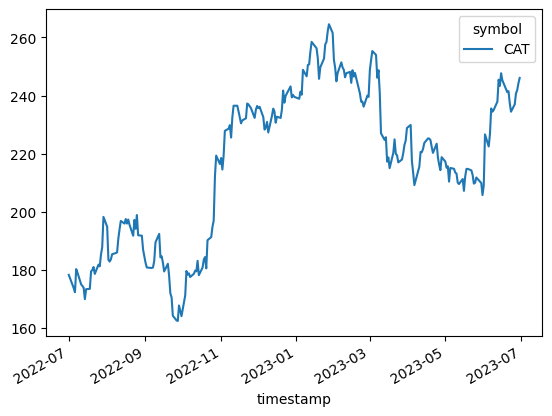

In [29]:
ticker = ["CAT"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim


stock_df_5 = ticker_data.loc[:,["close"]]
stock_df_5 = ticker_data[["close","symbol"]]
stock_df_5 = stock_df_5.pivot(columns='symbol', values='close')
stock_df_5.plot()

bb_signal_df_5  = ticker_data.copy()
bb_signal_df_5.head()

bbands_df_5 = TA.BBANDS(bb_signal_df_5)
bbands_df_5.iloc[17:1762, :]

bb_signal_df_5 = pd.concat([bb_signal_df_5, bbands_df_5], axis=1)
bb_signal_df_5.iloc[17:1762, :]


bb_signal_df_5["Signal"] = 0.0

for index, row in bb_signal_df_5.iterrows():
    if row["close"] < row["BB_LOWER"]:
        bb_signal_df_5.loc[index, "Signal"] = 1.0
    if row["close"] > row["BB_UPPER"]:
        bb_signal_df_5.loc[index,"Signal"] = -1.0


initial_capital = float(11111)
share_size = 62

bb_signal_df_5["Position"] = share_size * bb_signal_df_5["Signal"]
bb_signal_df_5.tail(2556)

bb_signal_df_5["Entry/Exit Position"] = bb_signal_df_5["Position"].diff()
bb_signal_df_5.tail(2556)

bb_signal_df_5["Portfolio Holdings"] = bb_signal_df_5["close"] * bb_signal_df_5["Position"]
bb_signal_df_5.tail(2556)

bb_signal_df_5["Portfolio Cash"] = (
    initial_capital - (bb_signal_df_5["close"] * bb_signal_df_5["Entry/Exit Position"]).cumsum()
)
bb_signal_df_5.tail(2556)

bb_signal_df_5["Portfolio Total"] = bb_signal_df_5["Portfolio Cash"] + bb_signal_df_5["Portfolio Holdings"]
bb_signal_df_5.tail(2556)

,open,high,low,close,volume,trade_count,vwap,symbol,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total
timestamp,,,,,,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,429.740,434.960,424.48,433.52,1287573,31823,430.857915,LMT,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN
2022-07-05 04:00:00+00:00,424.790,425.770,407.21,415.25,1705615,49773,413.083425,LMT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-06 04:00:00+00:00,416.900,427.860,415.28,425.89,1039842,31958,422.526700,LMT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-07 04:00:00+00:00,424.480,427.995,419.55,422.19,1172225,32741,422.068684,LMT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
2022-07-08 04:00:00+00:00,425.540,426.965,419.97,420.35,677987,21778,422.066554,LMT,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.00,11111.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,455.940,456.160,446.68,452.80,997564,32550,451.410367,LMT,468.392211,456.3220,444.251789,0.0,0.0,0.0,0.0,10098.75,10098.75
2023-06-27 04:00:00+00:00,452.790,455.630,452.42,453.15,671192,24019,453.555123,LMT,468.155695,456.5570,444.958305,0.0,0.0,0.0,0.0,10098.75,10098.75
2023-06-28 04:00:00+00:00,453.580,453.760,447.46,449.66,849050,29028,448.870719,LMT,467.998904,456.6415,445.284096,0.0,0.0,0.0,0.0,10098.75,10098.75


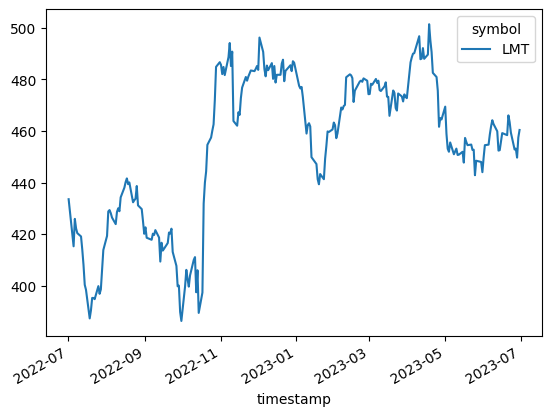

In [31]:
ticker = ["LMT"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim


stock_df_6 = ticker_data.loc[:,["close"]]
stock_df_6 = ticker_data[["close","symbol"]]
stock_df_6 = stock_df_6.pivot(columns='symbol', values='close')
stock_df_6.plot()

bb_signal_df_6  = ticker_data.copy()
bb_signal_df_6.head()

bbands_df_6 = TA.BBANDS(bb_signal_df_6)
bbands_df_6.iloc[17:1762, :]

bb_signal_df_6 = pd.concat([bb_signal_df_6, bbands_df_6], axis=1)
bb_signal_df_6.iloc[17:1762, :]


bb_signal_df_6["Signal"] = 0.0

for index, row in bb_signal_df_6.iterrows():
    if row["close"] < row["BB_LOWER"]:
        bb_signal_df_6.loc[index, "Signal"] = 1.0
    if row["close"] > row["BB_UPPER"]:
        bb_signal_df_6.loc[index,"Signal"] = -1.0


initial_capital = float(11111)
share_size = 25

bb_signal_df_6["Position"] = share_size * bb_signal_df_6["Signal"]
bb_signal_df_6.tail(2556)

bb_signal_df_6["Entry/Exit Position"] = bb_signal_df_6["Position"].diff()
bb_signal_df_6.tail(2556)

bb_signal_df_6["Portfolio Holdings"] = bb_signal_df_6["close"] * bb_signal_df_6["Position"]
bb_signal_df_6.tail(2556)

bb_signal_df_6["Portfolio Cash"] = (
    initial_capital - (bb_signal_df_6["close"] * bb_signal_df_6["Entry/Exit Position"]).cumsum()
)
bb_signal_df_6.tail(2556)

bb_signal_df_6["Portfolio Total"] = bb_signal_df_6["Portfolio Cash"] + bb_signal_df_6["Portfolio Holdings"]
bb_signal_df_6.tail(2556)

,open,high,low,close,volume,trade_count,vwap,symbol,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total
timestamp,,,,,,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,86.740,87.880,84.7100,87.55,26191123,201849,86.540483,XOM,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN
2022-07-05 04:00:00+00:00,86.340,86.700,83.0100,84.81,34470234,297815,84.383122,XOM,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.0,11111.0
2022-07-06 04:00:00+00:00,83.760,85.230,81.0100,83.28,33260418,287592,82.548775,XOM,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.0,11111.0
2022-07-07 04:00:00+00:00,85.380,86.760,85.3000,85.94,23760222,198580,86.142176,XOM,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.0,11111.0
2022-07-08 04:00:00+00:00,86.950,87.300,84.9300,86.08,17600178,145244,86.062859,XOM,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.0,11111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,102.200,104.905,102.2000,104.29,14283566,114758,104.216336,XOM,108.725742,105.0740,101.422258,0.0,0.0,0.0,0.0,11960.4,11960.4
2023-06-27 04:00:00+00:00,104.045,104.610,103.2700,104.55,13228394,107446,104.175853,XOM,108.712083,105.0530,101.393917,0.0,0.0,0.0,0.0,11960.4,11960.4
2023-06-28 04:00:00+00:00,104.305,105.820,103.2000,105.40,13084409,124664,105.033248,XOM,108.751252,105.1210,101.490748,0.0,0.0,0.0,0.0,11960.4,11960.4


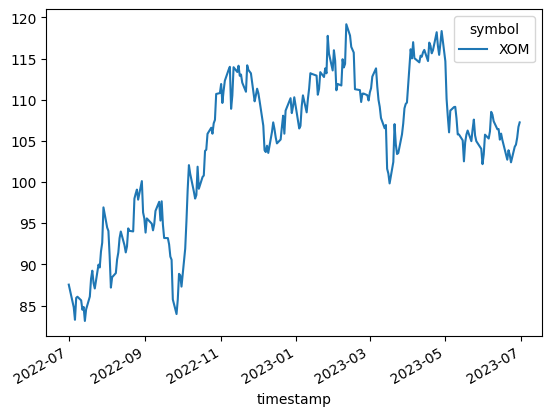

In [33]:
ticker = ["XOM"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim


stock_df_7 = ticker_data.loc[:,["close"]]
stock_df_7 = ticker_data[["close","symbol"]]
stock_df_7 = stock_df_7.pivot(columns='symbol', values='close')
stock_df_7.plot()

bb_signal_df_7  = ticker_data.copy()
bb_signal_df_7.head()

bbands_df_7 = TA.BBANDS(bb_signal_df_7)
bbands_df_7.iloc[17:1762, :]

bb_signal_df_7 = pd.concat([bb_signal_df_7, bbands_df_7], axis=1)
bb_signal_df_7.iloc[17:1762, :]


bb_signal_df_7["Signal"] = 0.0

for index, row in bb_signal_df_7.iterrows():
    if row["close"] < row["BB_LOWER"]:
        bb_signal_df_7.loc[index, "Signal"] = 1.0
    if row["close"] > row["BB_UPPER"]:
        bb_signal_df_7.loc[index,"Signal"] = -1.0


initial_capital = float(11111)
share_size = 155

bb_signal_df_7["Position"] = share_size * bb_signal_df_7["Signal"]
bb_signal_df_7.tail(2556)

bb_signal_df_7["Entry/Exit Position"] = bb_signal_df_7["Position"].diff()
bb_signal_df_7.tail(2556)

bb_signal_df_7["Portfolio Holdings"] = bb_signal_df_7["close"] * bb_signal_df_7["Position"]
bb_signal_df_7.tail(2556)

bb_signal_df_7["Portfolio Cash"] = (
    initial_capital - (bb_signal_df_7["close"] * bb_signal_df_7["Entry/Exit Position"]).cumsum()
)
bb_signal_df_7.tail(2556)

bb_signal_df_7["Portfolio Total"] = bb_signal_df_7["Portfolio Cash"] + bb_signal_df_7["Portfolio Holdings"]
bb_signal_df_7.tail(2556)

,open,high,low,close,volume,trade_count,vwap,symbol,BB_UPPER,BB_MIDDLE,BB_LOWER,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total
timestamp,,,,,,,,,,,,,,,,,
2022-07-01 04:00:00+00:00,52.48,53.180,51.840,53.10,1912006,20109,52.791508,CAH,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN
2022-07-05 04:00:00+00:00,52.83,52.910,51.320,52.25,1690728,24063,51.984616,CAH,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.0,11111.0
2022-07-06 04:00:00+00:00,52.23,53.260,51.920,52.64,2954564,25388,52.585577,CAH,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.0,11111.0
2022-07-07 04:00:00+00:00,52.54,52.960,52.130,52.75,2182198,24061,52.654958,CAH,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.0,11111.0
2022-07-08 04:00:00+00:00,52.92,53.820,52.740,52.92,1390050,19324,53.126559,CAH,NaN,NaN,NaN,0.0,0.0,0.0,0.0,11111.0,11111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 04:00:00+00:00,91.73,92.600,91.460,92.29,3133774,29611,91.992303,CAH,94.553370,87.0640,79.574630,0.0,0.0,0.0,0.0,9534.8,9534.8
2023-06-27 04:00:00+00:00,90.81,93.310,90.020,93.09,2002991,30294,92.812792,CAH,95.248591,87.5770,79.905409,0.0,0.0,0.0,0.0,9534.8,9534.8
2023-06-28 04:00:00+00:00,93.18,94.310,92.930,93.81,2262491,34109,93.851858,CAH,95.762551,88.2010,80.639449,0.0,0.0,0.0,0.0,9534.8,9534.8


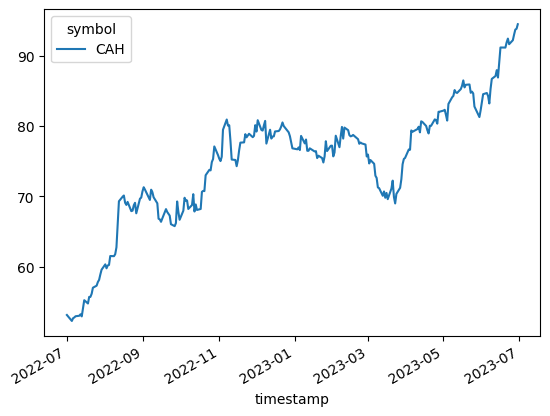

In [35]:
ticker = ["CAH"]

timeframe = "1D"

start_date = pd.Timestamp("2022-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-07-01", tz="America/New_York").isoformat()

ticker_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

sim=[]
for i in ticker:
    sim.append(ticker_data[ticker_data['symbol']==i].drop('symbol', axis=1))
sim


stock_df_8 = ticker_data.loc[:,["close"]]
stock_df_8 = ticker_data[["close","symbol"]]
stock_df_8 = stock_df_8.pivot(columns='symbol', values='close')
stock_df_8.plot()

bb_signal_df_8  = ticker_data.copy()
bb_signal_df_8.head()

bbands_df_8 = TA.BBANDS(bb_signal_df_8)
bbands_df_8.iloc[17:1762, :]

bb_signal_df_8 = pd.concat([bb_signal_df_8, bbands_df_8], axis=1)
bb_signal_df_8.iloc[17:1762, :]


bb_signal_df_8["Signal"] = 0.0

for index, row in bb_signal_df_8.iterrows():
    if row["close"] < row["BB_LOWER"]:
        bb_signal_df_8.loc[index, "Signal"] = 1.0
    if row["close"] > row["BB_UPPER"]:
        bb_signal_df_8.loc[index,"Signal"] = -1.0


initial_capital = float(11111)
share_size = 213

bb_signal_df_8["Position"] = share_size * bb_signal_df_8["Signal"]
bb_signal_df_8.tail(2556)

bb_signal_df_8["Entry/Exit Position"] = bb_signal_df_8["Position"].diff()
bb_signal_df_8.tail(2556)

bb_signal_df_8["Portfolio Holdings"] = bb_signal_df_8["close"] * bb_signal_df_8["Position"]
bb_signal_df_8.tail(2556)

bb_signal_df_8["Portfolio Cash"] = (
    initial_capital - (bb_signal_df_8["close"] * bb_signal_df_8["Entry/Exit Position"]).cumsum()
)
bb_signal_df_8.tail(2556)

bb_signal_df_8["Portfolio Total"] = bb_signal_df_8["Portfolio Cash"] + bb_signal_df_8["Portfolio Holdings"]
bb_signal_df_8.tail(2556)

In [41]:
sum_df = (
    bb_signal_df["Portfolio Cash"] + bb_signal_df["Portfolio Holdings"] +
    bb_signal_df_1["Portfolio Cash"] + bb_signal_df_1["Portfolio Holdings"] +
    bb_signal_df_2["Portfolio Cash"] + bb_signal_df_2["Portfolio Holdings"] +
    bb_signal_df_3["Portfolio Cash"] + bb_signal_df_3["Portfolio Holdings"] +
    bb_signal_df_4["Portfolio Cash"] + bb_signal_df_4["Portfolio Holdings"] +
    bb_signal_df_5["Portfolio Cash"] + bb_signal_df_5["Portfolio Holdings"] +
    bb_signal_df_6["Portfolio Cash"] + bb_signal_df_6["Portfolio Holdings"] +
    bb_signal_df_7["Portfolio Cash"] + bb_signal_df_7["Portfolio Holdings"] +
    bb_signal_df_8["Portfolio Cash"] + bb_signal_df_8["Portfolio Holdings"]
)

print(sum_df)

timestamp
2022-07-01 04:00:00+00:00         NaN
2022-07-05 04:00:00+00:00    99999.00
2022-07-06 04:00:00+00:00    99999.00
2022-07-07 04:00:00+00:00    99999.00
2022-07-08 04:00:00+00:00    99999.00
                               ...   
2023-06-26 04:00:00+00:00    96544.07
2023-06-27 04:00:00+00:00    96544.07
2023-06-28 04:00:00+00:00    96833.27
2023-06-29 04:00:00+00:00    96833.27
2023-06-30 04:00:00+00:00    96833.27
Length: 251, dtype: float64


In [ ]:
#BALANCED STOCK PORTFOLIO

#Each portfolio contains a starting amount of $100000 dvided equally between all stocks in the portfolio
    #Bollinger Bands being used to make trade decisions
    #There are 6 stocks in this portfolio therefore $16666 in each stock
    #Ideally share amount/trade would being dynamic, continuousily dividing $16666 by the current price to avoid using more funds than are dedicated for that stock. 
    #For the purpose of this exercise we will use $16666 divided by the price on th start date to determine share amount/trade.
